In [59]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import preprocess_all_data


all_data = preprocess_all_data(pd.read_csv('data_candidates.csv', sep=';', header=None),
                               pd.read_csv('data_jobs.csv', sep=';', header=None),
                               pd.read_csv('data_candidates_education.csv', sep=';', header=None),
                               pd.read_csv('data_candidates_work_places.csv', sep=';', header=None))

mask = np.random.choice([True, False], size=len(all_data), p=[0.05, 0.95])

training_data = np.asarray(all_data[~mask][all_data.columns[:-1]])
training_labels = np.asarray(all_data[~mask]['status'])
test_data = np.asarray(all_data[mask][all_data.columns[:-1]])
test_labels = np.asarray(all_data[mask]['status'])

In [89]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(34, )),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(8, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation=tf.nn.relu)
])


model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'mse',
              metrics=['accuracy'])

In [90]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)
history = model.fit(training_data, training_labels, epochs=25, validation_split=0.1, batch_size=128, )
model.evaluate(test_data, test_labels)

Epoch 1/25
147/147 [==============================] - 1s 6ms/step - loss: 0.2379 - accuracy: 0.6669 - val_loss: 0.0903 - val_accuracy: 0.9498
Epoch 2/25
147/147 [==============================] - 1s 5ms/step - loss: 0.2140 - accuracy: 0.6812 - val_loss: 0.0969 - val_accuracy: 0.9498
Epoch 3/25
147/147 [==============================] - 1s 5ms/step - loss: 0.2070 - accuracy: 0.6845 - val_loss: 0.1033 - val_accuracy: 0.9488
Epoch 4/25
147/147 [==============================] - 1s 5ms/step - loss: 0.2031 - accuracy: 0.6883 - val_loss: 0.1106 - val_accuracy: 0.9498
Epoch 5/25
147/147 [==============================] - 1s 5ms/step - loss: 0.1999 - accuracy: 0.6969 - val_loss: 0.1160 - val_accuracy: 0.9440
Epoch 6/25
147/147 [==============================] - 1s 5ms/step - loss: 0.1986 - accuracy: 0.6968 - val_loss: 0.1008 - val_accuracy: 0.9469
Epoch 7/25
147/147 [==============================] - 1s 5ms/step - loss: 0.1980 - accuracy: 0.6972 - val_loss: 0.1159 - val_accuracy: 0.9393
Epoch 

[0.16874653100967407, 0.7584629654884338]

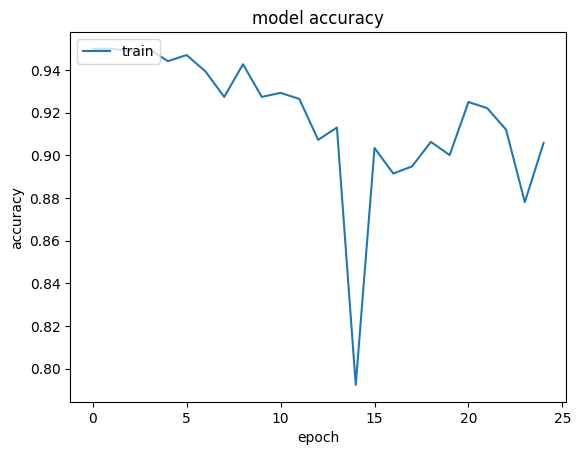

In [91]:
np.set_printoptions(suppress=True)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

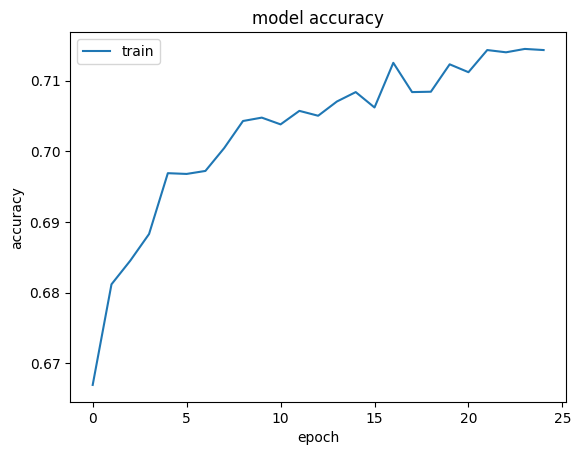

In [92]:
np.set_printoptions(suppress=True)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [93]:
max(model.predict(test_data))

35/35 [==============================] - 0s 2ms/step


array([0.83930707], dtype=float32)

In [8]:
test_data = preprocess_all_data(pd.read_csv('test_candidates.csv', sep=';', header=None),
                               pd.read_csv('test_jobs.csv', sep=';', header=None),
                               pd.read_csv('test_candidates_education.csv', sep=';', header=None),
                               pd.read_csv('test_candidates_workplaces.csv', sep=';', header=None), test = True)



KeyError: 14